In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/calibration_opdyts.p .

calibration_opdyts.p                          100%   15MB   5.5MB/s   00:02    


In [3]:
with open("calibration_opdyts.p", "rb") as f:
    data = pickle.load(f)

In [4]:
len(data["evaluations"])

176

In [5]:
for e in data["evaluations"]:
    info = e["information"]["opdyts"]
    
    print(
        info["type"],
        info["candidate"] if "candidate" in info else "-",
        e["transitional"], e["values"]
    )

initial - True [0.0, 0.0, 0.0]
candidate 0 True [ 0.17640523  0.1867558  -0.01032189]
candidate 1 True [ 0.04001572 -0.09772779  0.04105985]
candidate 2 True [0.0978738  0.09500884 0.01440436]
candidate 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 2 True [0.0978738  0.0

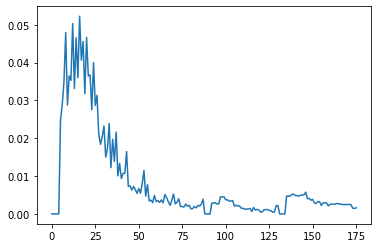

In [6]:
plt.plot([
    "equilibrium_gap" in e["information"]["opdyts"] and e["information"]["opdyts"]["equilibrium_gap"]
    for e in data["evaluations"]
])

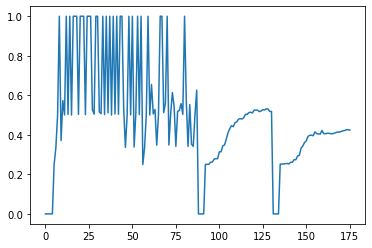

In [7]:
plt.plot([
    "uniformity_gap" in e["information"]["opdyts"] and e["information"]["opdyts"]["uniformity_gap"]
    for e in data["evaluations"]
])

In [27]:
[
        e for e in data["evaluations"]
        if "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == candidate
    ]

[{'transitional': True,
  'objective': 0.004011807448863052,
  'values': array([ 0.22408932, -0.01513572,  0.14542735]),
  'information': {'opdyts': {'type': 'candidate',
    'candidate': 3,
    'iteration': 1,
    'restart': '38e4efe5f788c1d01f107dfa125f7c17',
    'restart_convergence': False},
   'z': array([ 2.2408932 , -0.15135721,  1.45427351]),
   'termination': {'modes': {'car': {'y': array([0.34796777, 0.34459944, 0.34367384, 0.34291802, 0.34379981,
             0.34372861, 0.34372861, 0.34440227, 0.34418319, 0.34333974,
             0.34357525, 0.34384362, 0.34291254, 0.34263869, 0.34267155,
             0.34326854, 0.34314805, 0.34364097, 0.34360811, 0.34384362,
             0.34390935, 0.34430369, 0.34484043, 0.3442051 , 0.34384362,
             0.34402436, 0.34487877, 0.34415581, 0.3447528 , 0.34476375,
             0.34491163, 0.34449538, 0.34484043, 0.34472541, 0.34409009,
             0.34434203, 0.34400245, 0.34416129, 0.34472541, 0.34498283,
             0.34456658, 0.

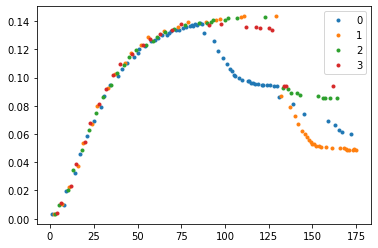

In [42]:
for candidate in [0, 1, 2, 3]:
    transitions = np.array([
        0.0 if e["information"]["opdyts"]["type"] == "candidate" else e["information"]["opdyts"]["transition"]
        for e in data["evaluations"]
        if "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == candidate
    ])
    
    iterations = np.array([
        e["information"]["opdyts"]["iteration"]
        for e in data["evaluations"]
        if "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == candidate
    ])
    
    f = np.array([
        "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == candidate
        for e in data["evaluations"]
    ])
    
    evaluations = np.arange(len(f))[f]
    
    objectives = [
        e["objective"] for e in data["evaluations"]
        if "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == candidate
    ]

    #plt.plot(iterations * 50 + transitions, objectives, label = str(candidate), marker = ".", linestyle = "none")
    plt.plot(evaluations, objectives, label = str(candidate), marker = ".", linestyle = "none")
    
plt.legend(loc = "best")

In [9]:
for evaluation in data["evaluations"]:
    if not evaluation["transitional"]:
        print(evaluation["information"]["opdyts"].keys())
        print(evaluation["information"]["opdyts"]["candidate"])

dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'restart_convergence', 'transition'])
0
dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'restart_convergence', 'transition'])
0
dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'restart_convergence', 'transition'])
1


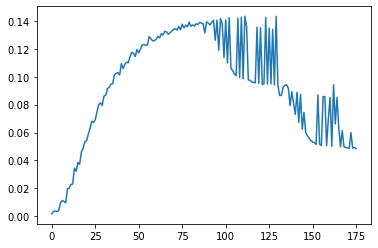

In [10]:
objectives = [
    evaluation["objective"] for evaluation in data["evaluations"]
]

plt.plot(objectives)

In [11]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/working_directory/220d9277677dcab75d059fedec77b3d3/output/boptx_termination.csv .

scp: /home/sebastian/work/boptx/examples/matsim/working_directory/220d9277677dcab75d059fedec77b3d3/output/boptx_termination.csv: No such file or directory


In [12]:
df = pd.read_csv("boptx_termination.csv", sep = ";")

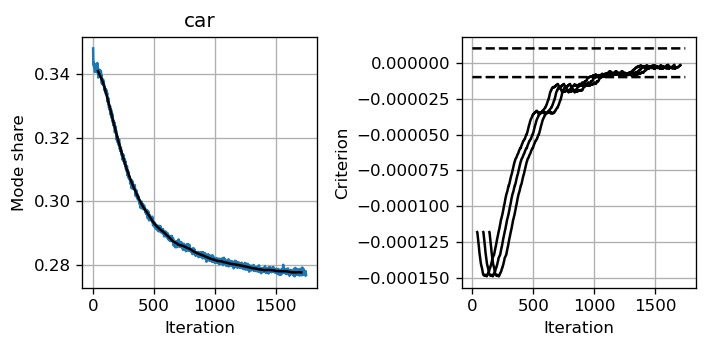

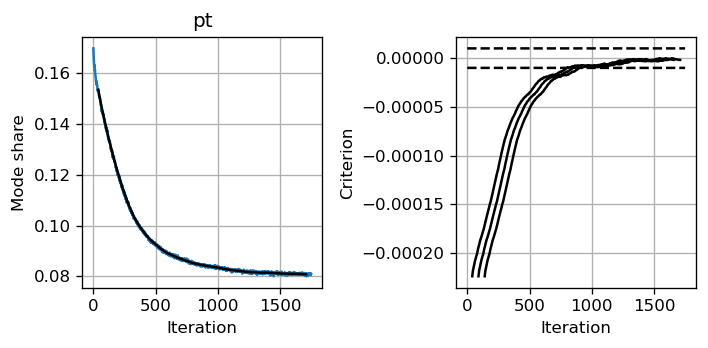

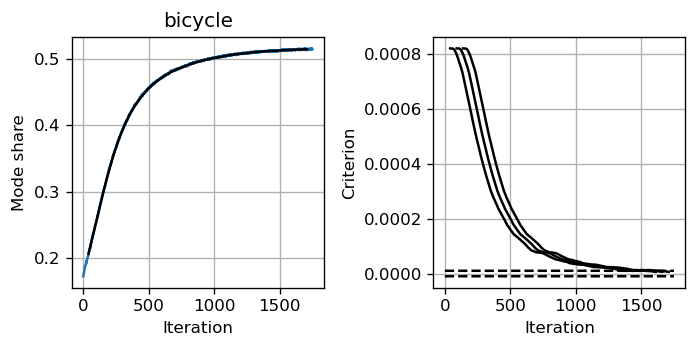

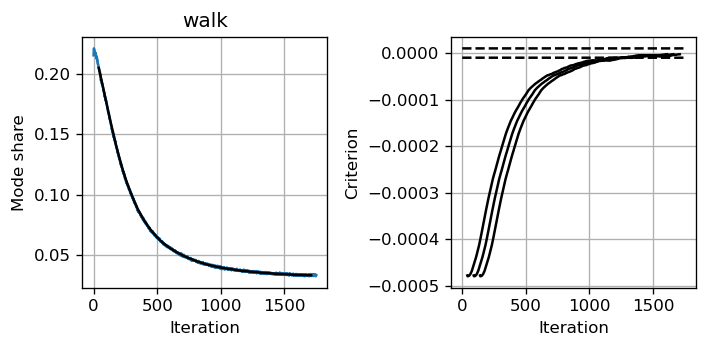

In [13]:
for mode in ["car", "pt", "bicycle", "walk"]:
    plt.figure(figsize = (6, 3), dpi = 120)

    plt.subplot(1, 2, 1)
    plt.plot(df["iteration"], df["{}_y".format(mode)], "C0")
    plt.plot(df["iteration"], df["{}_s".format(mode)], "k")
    plt.title(mode)
    plt.xlabel("Iteration")
    plt.ylabel("Mode share")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(df["iteration"], df["{}_dm".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_d".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_dp".format(mode)], "k")

    plt.plot(df["iteration"], df["T"], "k--")
    plt.plot(df["iteration"], -df["T"], "k--")
    plt.xlabel("Iteration")
    plt.ylabel("Criterion")
    plt.grid()

    plt.tight_layout()

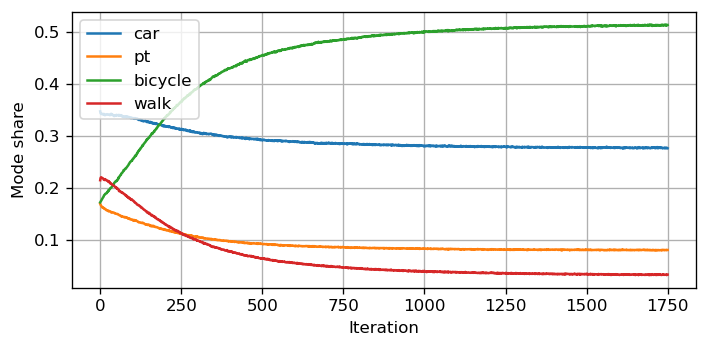

In [14]:
plt.figure(figsize = (6, 3), dpi = 120)

for mode in ["car", "pt", "bicycle", "walk"]:
    plt.plot(df["iteration"], df["{}_y".format(mode)], label = mode)
    
plt.xlabel("Iteration")
plt.ylabel("Mode share")
plt.grid()
plt.legend(loc = "best")

plt.tight_layout()